In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
json = pd.read_json(r"C:\Users\hp\Downloads\sales_data_sample.json")

In [3]:
excel = pd.read_excel(r"C:\Users\hp\Downloads\sales_data_sample.xlsx")

In [4]:
csv = pd.read_csv(r"C:\Users\hp\Downloads\sales_data_sample.csv", encoding = 'latin1')

In [5]:
# 2. Combine the data into a single dataframe
# (assuming all files have similar columns for simplicity)
data = pd.concat([csv, excel, json], ignore_index=True)

In [6]:
# 3. Explore the structure and content
print("Data Info:")
print(data.info())
print("\nData Head:")
print(data.head())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       8469 non-null   int64  
 1   QUANTITYORDERED   8469 non-null   int64  
 2   PRICEEACH         8469 non-null   float64
 3   ORDERLINENUMBER   8469 non-null   int64  
 4   SALES             8469 non-null   float64
 5   ORDERDATE         8469 non-null   object 
 6   STATUS            8469 non-null   object 
 7   QTR_ID            8469 non-null   int64  
 8   MONTH_ID          8469 non-null   int64  
 9   YEAR_ID           8469 non-null   int64  
 10  PRODUCTLINE       8469 non-null   object 
 11  MSRP              8469 non-null   int64  
 12  PRODUCTCODE       8469 non-null   object 
 13  CUSTOMERNAME      8469 non-null   object 
 14  PHONE             8469 non-null   object 
 15  ADDRESSLINE1      8469 non-null   object 
 16  ADDRESSLINE2      906 non-null 

In [7]:
# Checking for missing values and duplicates
print("\nMissing Values:")
print(data.isnull().sum())
print("\nDuplicate Rows:", data.duplicated().sum())


Missing Values:
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        7563
CITY                   0
STATE               4458
POSTALCODE           228
COUNTRY                0
TERRITORY           3222
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Duplicate Rows: 3039


In [8]:
# 4. Data Cleaning: handle missing values and duplicates
# Drop duplicates
data = data.drop_duplicates()

In [11]:
# Handle missing values by filling numeric columns with the mean
for column in data.select_dtypes(include=[np.number]).columns:
    data[column] = data[column].fillna(data[column].mean())

In [12]:
# Handle categorical columns, including mixed-type columns
for column in data.select_dtypes(include=[object]).columns:
    try:
        # Attempt to fill with mode
        data[column] = data[column].fillna(data[column].mode()[0])
    except TypeError:
        # Convert to string if mode calculation fails
        data[column] = data[column].astype(str).fillna(data[column].astype(str).mode()[0])

In [15]:
#Data Transformation
# Derive a new column for year, handling inconsistent date formats
data['Year_ID'] = pd.to_datetime(data['ORDERDATE'], errors='coerce').dt.year

# Calculate total price for each order
data['MSRP'] = data['QUANTITYORDERED'] * data['PRICEEACH']

In [18]:
# 7. Data Analysis: descriptive statistics and metrics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   5430.000000      5430.000000  5430.000000      5430.000000   
mean   10258.490608        35.127993    83.684917         6.461326   
std       92.673268         9.752661    20.229309         4.217546   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10178.000000        27.000000    68.727500         3.000000   
50%    10262.000000        35.000000    96.000000         6.000000   
75%    10336.000000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID      YEAR_ID         MSRP  \
count   5430.000000  5430.000000  5430.000000  5430.000000  5430.000000   
mean    3564.676201     2.706077     7.061878  2003.815285  2940.625628   
std     1848.781254     1.203612     3.667755     0.705181  1108.088155   
min      482.130000     1.000000     1.00000

In [20]:
# Calculate specific metrics
total_sales = data['MSRP'].sum()
average_order_value = data['MSRP'].mean()
sales_by_category = data.groupby('PRODUCTLINE')['MSRP'].sum()

In [21]:
print(f"\nTotal Sales: ${total_sales:.2f}")
print(f"Average Order Value: ${average_order_value:.2f}")
print("Sales by Category:")
print(sales_by_category)


Total Sales: $15967597.16
Average Order Value: $2940.63
Sales by Category:
PRODUCTLINE
Classic Cars        5819780.48
Motorcycles         1901298.27
Planes              1673054.27
Ships               1206655.65
Trains               384893.90
Trucks and Buses    1865479.04
Vintage Cars        3116435.55
Name: MSRP, dtype: float64


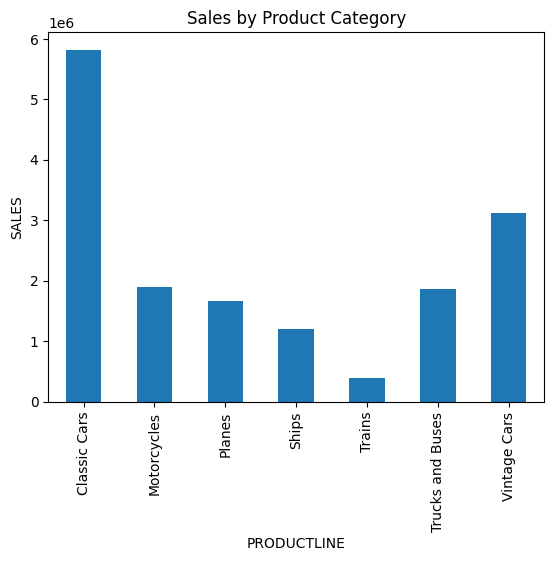

In [22]:
# 8. Data Visualization
# Bar plot of sales by category
sales_by_category.plot(kind='bar', title='Sales by Product Category')
plt.ylabel('SALES')
plt.show()

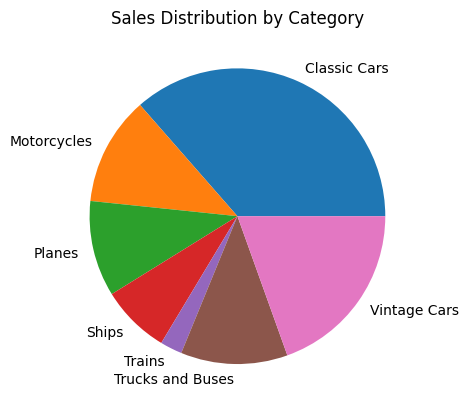

In [26]:
# Pie chart of sales distribution across categories
sales_by_category.plot(kind='pie', title='Sales Distribution by Category')
plt.ylabel('')
plt.show()

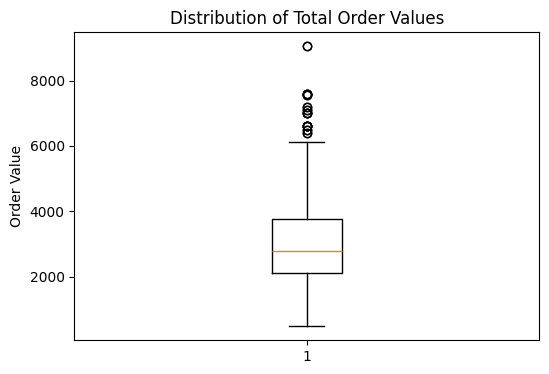

In [28]:
# Box plot of order values
plt.figure(figsize=(6, 4))
plt.boxplot(data['MSRP'].dropna())
plt.title('Distribution of Total Order Values')
plt.ylabel('Order Value')
plt.show()

import pandas as pd

# Load the CSV file
csv_file = 'sales_data_sample.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file)

# Convert the DataFrame to JSON format
json_data = data.to_json(orient='records')

# Save the JSON data to a file
with open('sales_data_sample.json', 'w') as json_file:
    json_file.write(json_data)

print("CSV has been successfully converted to JSON!")
